In [1]:
import pandas as pd

In [2]:
pst=pd.read_csv('D:/DataScience/Datas/PlayStore/playstore.csv',index_col=0)
pst.columns=pst.columns.str.lower()

In [3]:
pst.head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,current ver,android ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


Null Check

In [5]:
pst.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content rating    0
genres            0
current ver       0
android ver       0
day               0
month             0
year              0
dtype: int64

In [6]:
pst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          10840 non-null  float64
 3   reviews         10840 non-null  int64  
 4   size            10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10840 non-null  object 
 7   price           10840 non-null  float64
 8   content rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  current ver     10840 non-null  object 
 11  android ver     10840 non-null  object 
 12  day             10840 non-null  int64  
 13  month           10840 non-null  int64  
 14  year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


## To select ***data types*** from a Dataset

In [8]:
pst_corr=pst.select_dtypes(include=['int64','float64'])
pst_corr=pst_corr.drop(columns=['month','day'])
pst_corr.head()

,rating,reviews,size,installs,price,year
0,4.1,159,19000.0,10000,0.0,2018
1,3.9,967,14000.0,500000,0.0,2018
2,4.7,87510,8700.0,5000000,0.0,2018
3,4.5,215644,25000.0,50000000,0.0,2018
4,4.3,967,2800.0,100000,0.0,2018


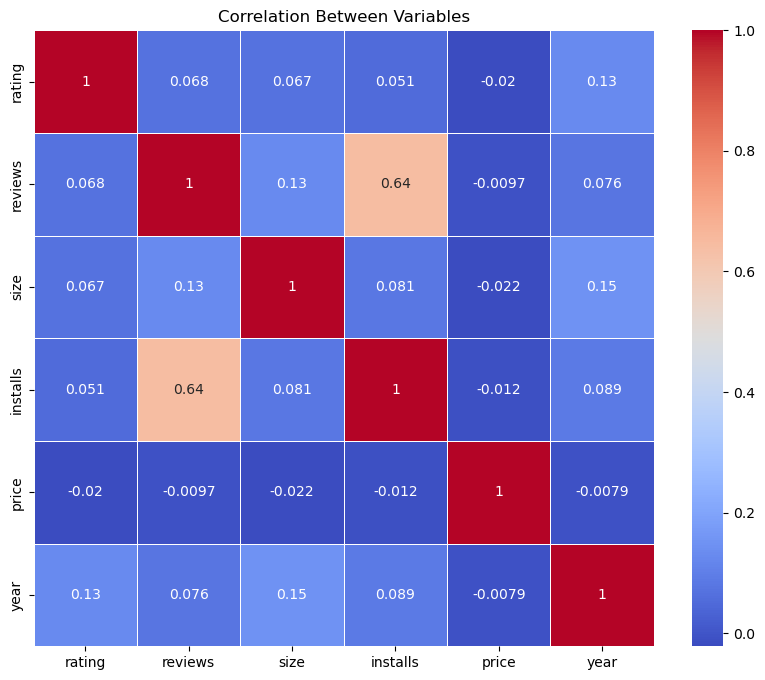

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
corr=pst_corr.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Between Variables')
plt.show()

## Key Insight
>The strongest relationships in this dataset are between the number of reviews and installs (0.64), indicating that apps with more installs tend to have more reviews.

>The rest of the variables exhibit mostly weak correlations, meaning that no other strong linear relationships exist in the dataset between variables like size, price, and rating.

## zip() in Python is a built-in function that combines elements from multiple iterables (like lists, tuples, or strings) into a single iterable of tuples

__________________________________________________________________________________________________________________________________________________

### list1 and list2 are two lists.

### zip(list1, list2) creates a new iterable where the first element of list1 is paired with the first element of list2, the second element of list1 is paired with the second element of list2, and so on.

### list(zipped_list) converts the iterable into a list for printing.

In [19]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
zipped_list = zip(list1, list2)
print(list(zipped_list))

[(1, 'a'), (2, 'b'), (3, 'c')]


________________________________________________________________________________________________________________________________________________________

The map() function applies a function to each element of a Series. In this case, it applies the category_color_map dictionary.

For each value in the 'category' column, it looks up the corresponding color in the dictionary. If a match is found, it replaces the value in the 

Series with the color. If no match is found, the value remains unchanged.

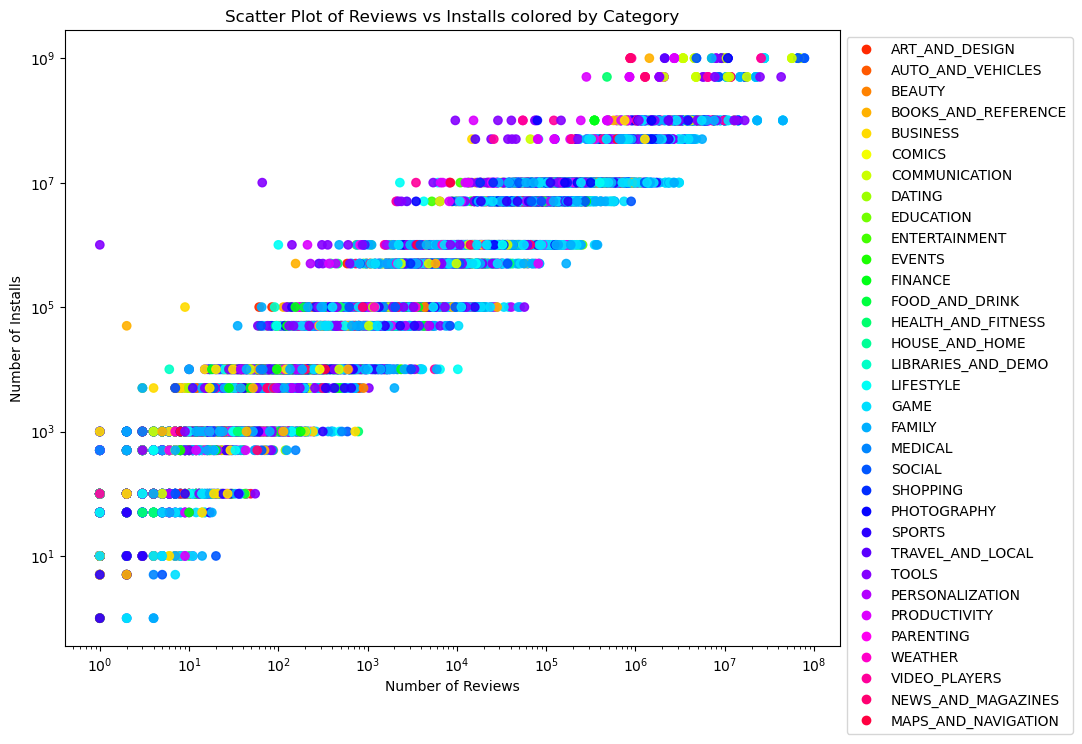

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#create color palette
app_cat=pst['category'].unique()
app_clr=sns.color_palette('hsv',len(app_cat))

#assign color using map()
app_catclr=dict(zip(app_cat,app_clr))
color=pst['category'].map(app_catclr)

#plot
plt.figure(figsize=(10,8))
plt.scatter(pst['reviews'],pst['installs'],c=color,alpha=0.9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.title('Scatter Plot of Reviews vs Installs colored by Category')

#legend
handles=[plt.Line2D([0],[0],marker='o',color=c,linestyle='')
        for c in app_clr]
plt.legend(handles,app_cat,bbox_to_anchor=(1,1))


## Key Insights
> **Correlation:** There is a general upward trend, meaning apps with more reviews tend to have more installs, but this relationship isn't perfectly linear—many apps have the same number of installs with varying numbers of reviews.

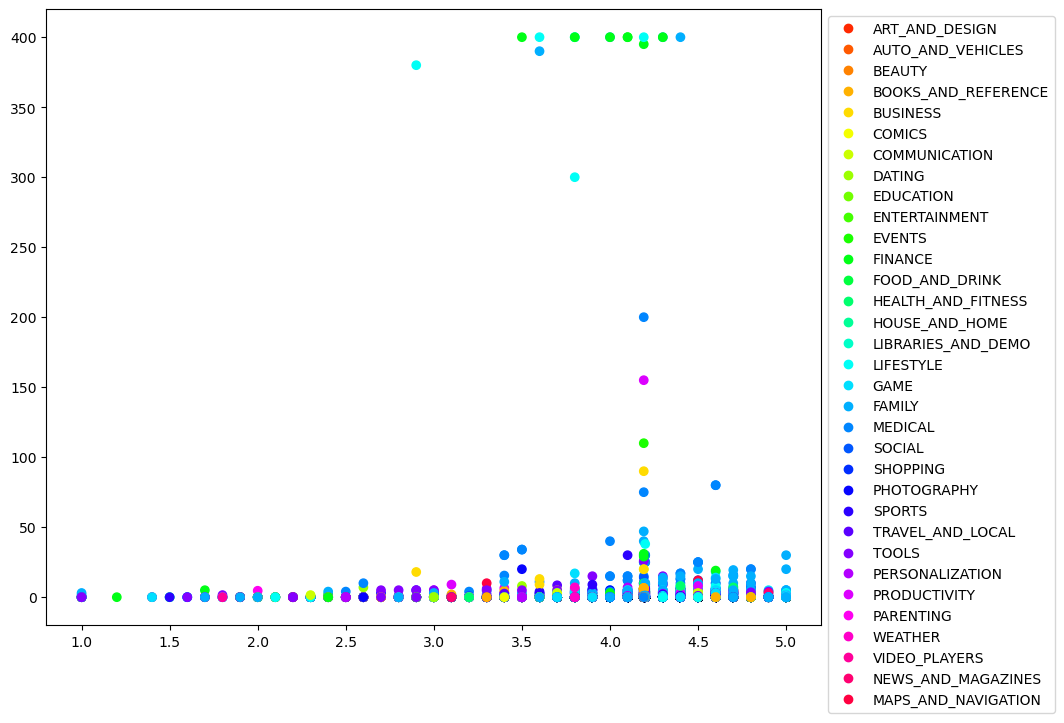

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

app_cat=pst['category'].unique()
app_clr=sns.color_palette('hsv',len(app_cat))



match=dict(zip(app_cat,app_clr))
colors=pst['category'].map(match)

plt.figure(figsize=(10,8))
plt.scatter(pst['rating'],pst['price'],c=colors)

handles=[plt.Line2D([0],[0],marker='o',color=c,linestyle='')
for c in app_clr]
plt.legend(handles,app_cat,bbox_to_anchor=(1,1))
plt.show()

In [25]:
#Create review cat and how humch intsall is there

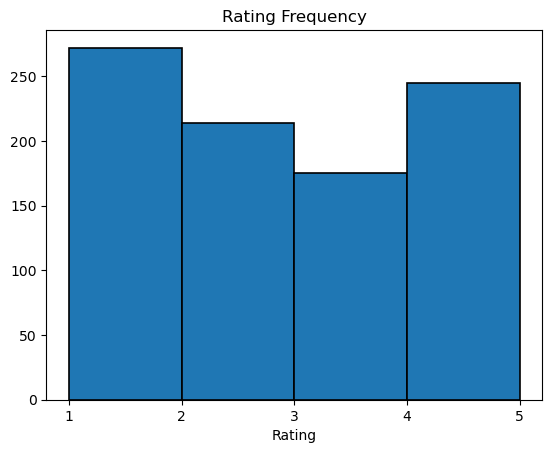

In [145]:
import matplotlib.pyplot as plt
bins=[1,2,3,4,5]
plt.hist(pst['reviews'],bins=[1,2,3,4,5],range=(0,5),edgecolor='black',linewidth=1.2)
plt.xticks(bins)
plt.xlabel('Rating')
plt.title('Rating Frequency')
plt.show()

## Key Insights:

>Low Ratings apps are more in play store

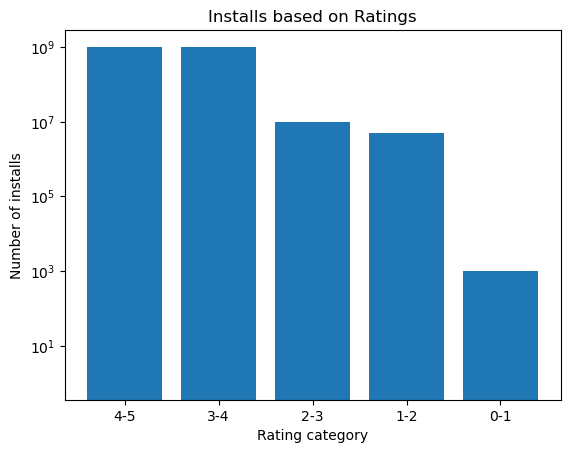

In [28]:

bin=[0,1,2,3,4,5]

label=['0-1','1-2','2-3','3-4','4-5']

pst['rating category']=pd.cut(pst['rating'],labels=label,bins=bin,ordered=True,include_lowest=True)
#If 0 is part of your dataset and you want to include it in the '0-1' category:

plt.bar(pst['rating category'],pst['installs'])
plt.yscale('log')
plt.xlabel('Rating category')
plt.ylabel('Number of installs')
plt.title('Installs based on Ratings')
plt.show()




## Key Insights:

>People prefer to download apps with high rating

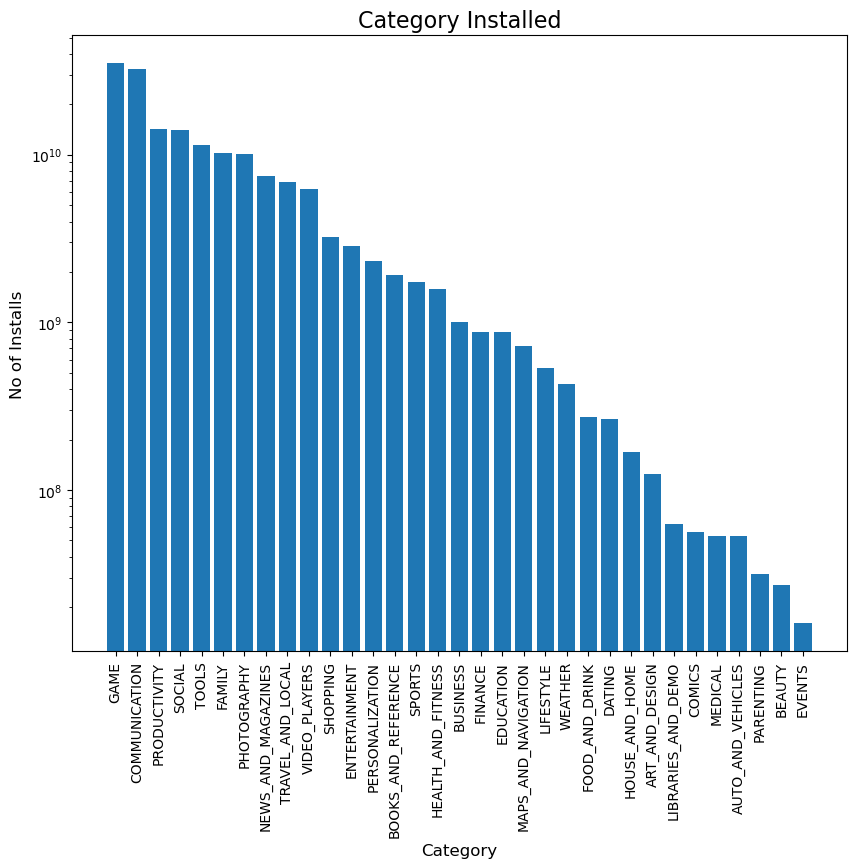

In [29]:
cat_grp=pst.groupby('category',observed=True)['installs'].sum()
cat_grp=cat_grp.sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(cat_grp.index,cat_grp.values)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Category',fontsize=12)
plt.ylabel('No of Installs',fontsize=12)
plt.title('Category Installed',fontsize=16)
plt.show()

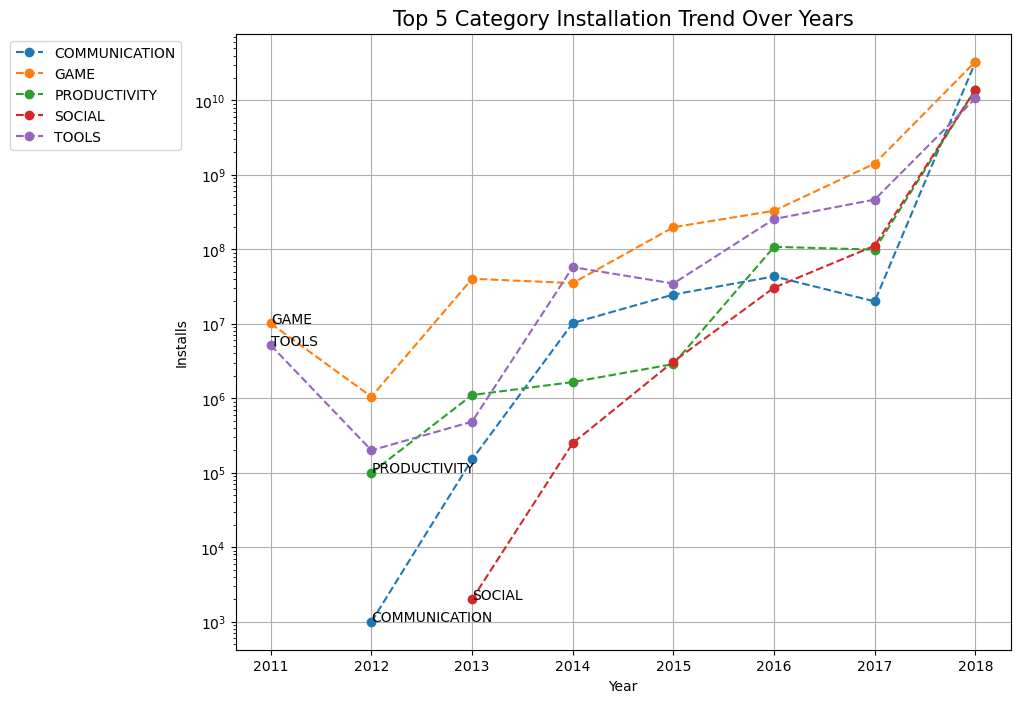

In [154]:
cat5=cat_grp.iloc[0:5].reset_index()
cat5=cat5['category'].unique().tolist()

c5df=pst[pst['category'].isin(cat5)]
c5df['category'].unique()

import matplotlib.pyplot as plt

c5_grp = [(cat, group.groupby('year', observed=True)['installs'].sum())
          for cat, group in c5df.groupby('category', observed=True)]


plt.figure(figsize=(10, 8))

for lab, val in c5_grp:
    plt.plot(val.index, val.values, marker='o', label=lab, linestyle='--')
    
    # Annotate the first point of each line
    x1 = val.index[0]
    y1 = val.values[0]
    plt.text(x1, y1, lab)
    
plt.xlabel('Year')
plt.ylabel('Installs')
plt.title('Top 5 Category Installation Trend Over Years', fontsize=15)
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1))
# Enable grid
plt.grid()
# Set log scale for y-axis
plt.yscale('log')
# Show the plot
plt.show()



## Key Insghts:
>Growth Across Categories: All categories have shown growth in terms of installs over time, with each experiencing a significant increase from 2011 to 2018.

>Games and Communication Lead in Popularity: By 2018, Game and Communication categories have reached the highest number of installs, surpassing others, with installs crossing $10^{10}$

>Rapid Growth of Social Apps: The Social category started at a much lower level compared to others but grew rapidly, especially from 2014 onwards, eventually nearing Tools and Productivity by 2018.

>Initial Leading Categories: In 2011, Tools and Productivity had higher installs compared to other categories, but their growth was overtaken by Games and Communication by 2013.

>General Trend: There is a general upward trend across all categories, with a noticeable increase between 2016 and 2018 for all categories.

________________________________________________________________________________________________________________________________________________________

In [37]:
game=pst[pst['category']=='GAME'].copy()

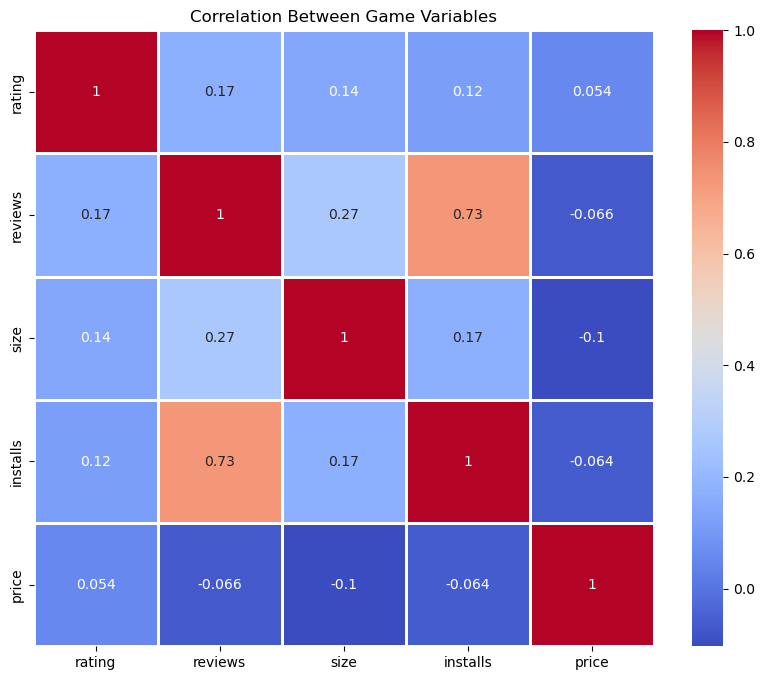

In [159]:
import seaborn as sns
gm=game.select_dtypes(include=['int64','float64'])
gm=gm.drop(columns=['day','month','year'])
gm_cor=gm.corr()

plt.figure(figsize=(10,8))
sns.heatmap(gm_cor,annot=True,cmap='coolwarm',linewidth=0.8)
plt.title('Correlation Between Game Variables')

plt.show()

**Key Insights**

>***Strong Positive Correlation between Reviews and Installs (0.73):***
 * The strongest relationship is between reviews and installs, with a correlation of 0.73, which suggests that apps with more installs tend to receive 
 more reviews. This makes sense because a larger user base is likely to result in more reviews.

>***Negative Correlations:***
* Price has a weak negative correlation with other variables, such as reviews (-0.066), size (-0.1), and installs (-0.064), meaning apps with higher prices tend to have fewer installs, reviews, and might even be smaller in size.
* The negative correlation between price and reviews/installs suggests that users might be less inclined to download or review apps that have a higher price point

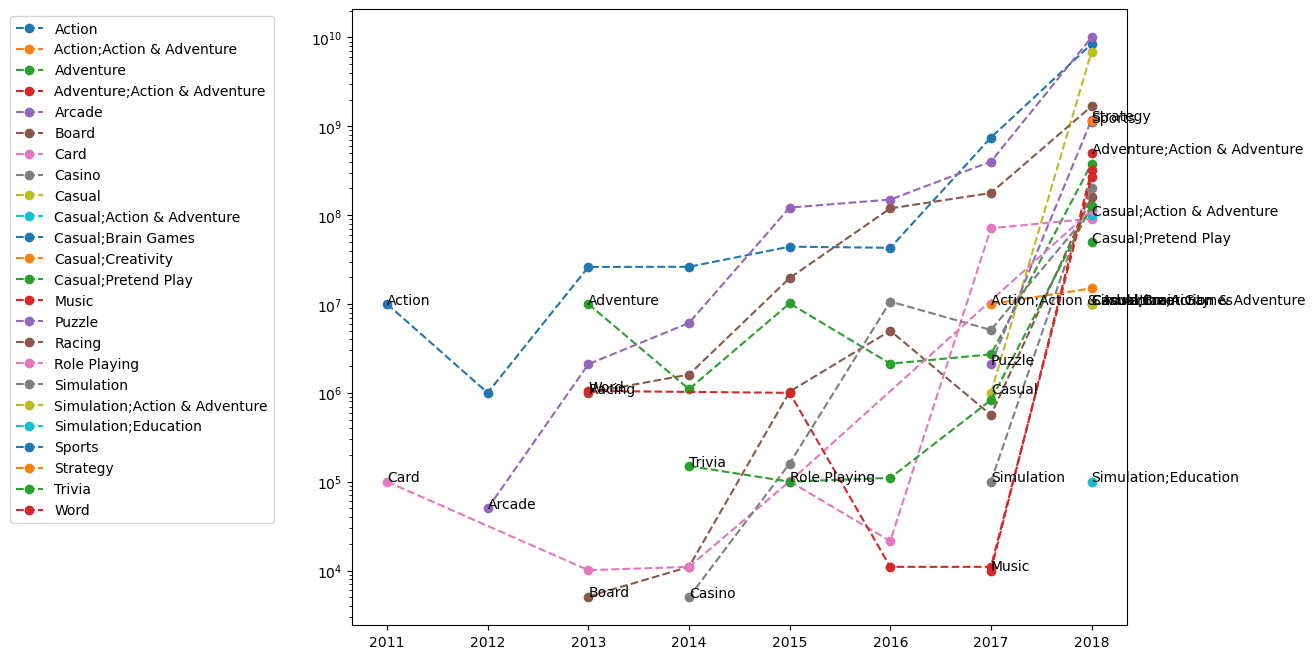

In [42]:

import matplotlib.pyplot as plt
gen_groups = [(genre, group.groupby('year',observed=False)['installs'].sum())
             for genre,group in game.groupby('genres',observed=False)]
plt.figure(figsize=(10,8))
for gen,grp in gen_groups:
    plt.plot(grp.index,grp.values,label=gen,marker='o',linestyle='--')
    y_firstvalue = grp.values[0]
    x_firstyear = grp.index[0]

    # Plot the text with the genre name at the first data point
    plt.text(x_firstyear, y_firstvalue + 3, gen)

plt.yscale('log')
plt.legend(loc='upper left',bbox_to_anchor=(-0.45,1))


## Since the graph is clustered and unreadable. We will split and plot it

________________________________________________________________________________________________________________________________________________________

## We'll find most installed apps in descending order

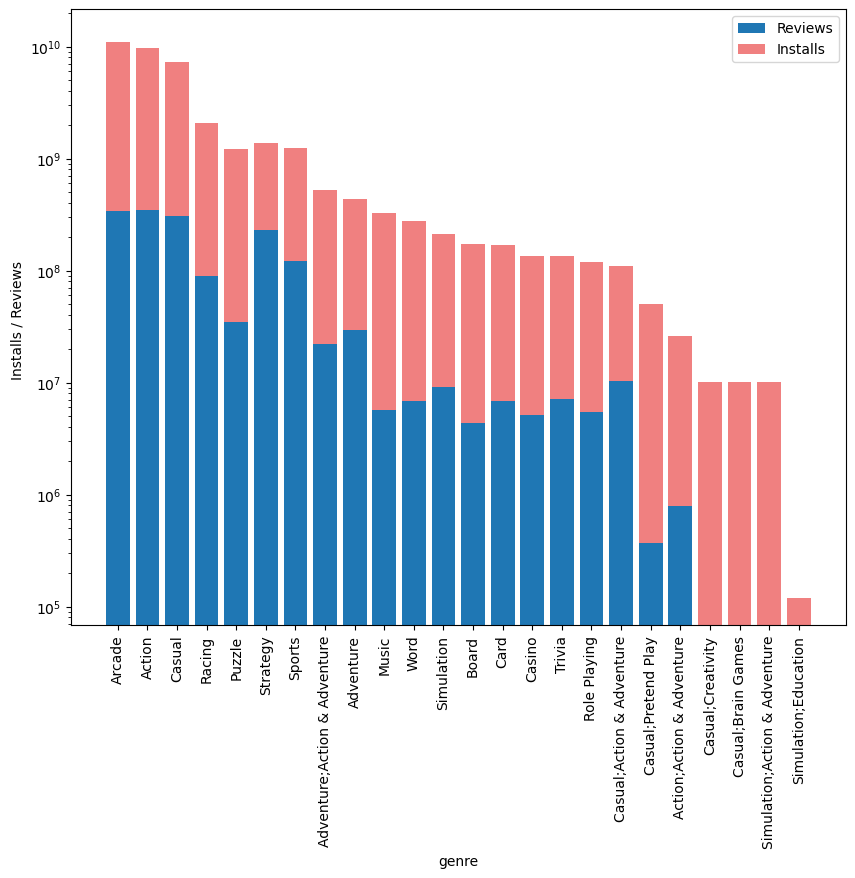

In [46]:
g_genre=game['genres'].unique()
g_genre=g_genre.tolist()



g_ir=game.groupby('genres',observed=False)[['installs','reviews']].sum()
g_ir=g_ir.sort_values(by='installs',ascending=False)

gi=g_ir.values[:,0]
gr=g_ir.values[:,1]
plt.figure(figsize=(10,8))
plt.bar(g_ir.index,gr,label='Reviews')
plt.bar(g_ir.index,gi,color='lightcoral',bottom=gr,label='Installs')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('genre')
plt.ylabel('Installs / Reviews ')
plt.legend()
plt.show()


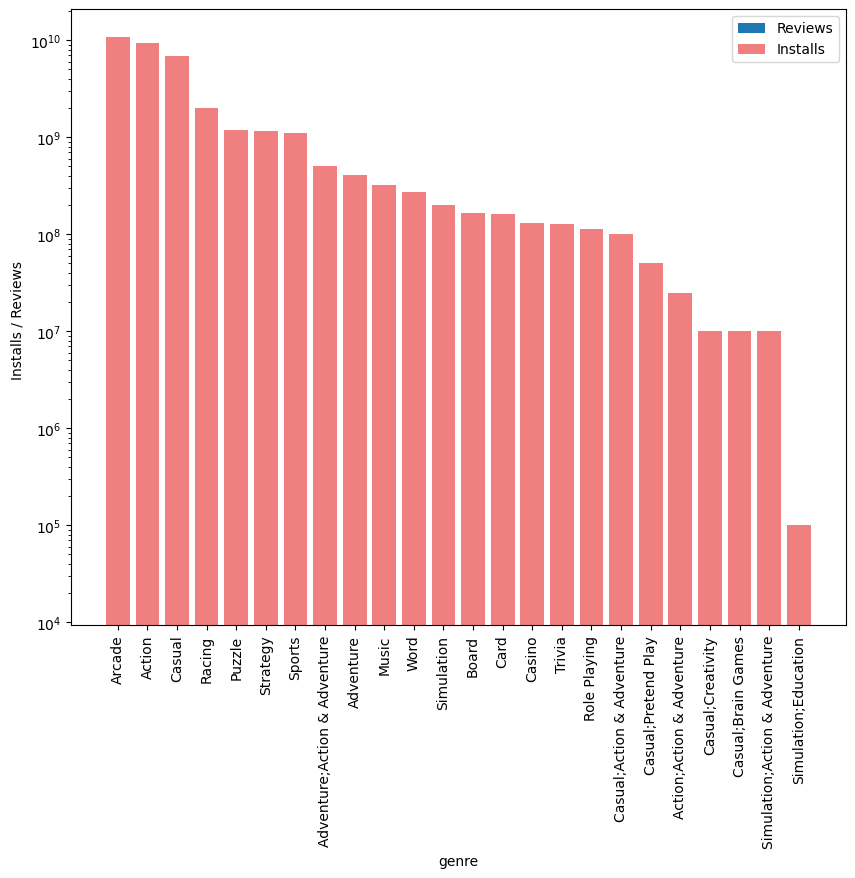

In [47]:
g_genre=game['genres'].unique()
g_genre=g_genre.tolist()



g_ir=game.groupby('genres',observed=False)[['installs','reviews']].sum()
g_ir=g_ir.sort_values(by='installs',ascending=False)

gi=g_ir.values[:,0]
gr=g_ir.values[:,1]
plt.figure(figsize=(10,8))
plt.bar(g_ir.index,gr,label='Reviews')
plt.bar(g_ir.index,gi,color='lightcoral',label='Installs')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('genre')
plt.ylabel('Installs / Reviews ')
plt.legend()
plt.show()


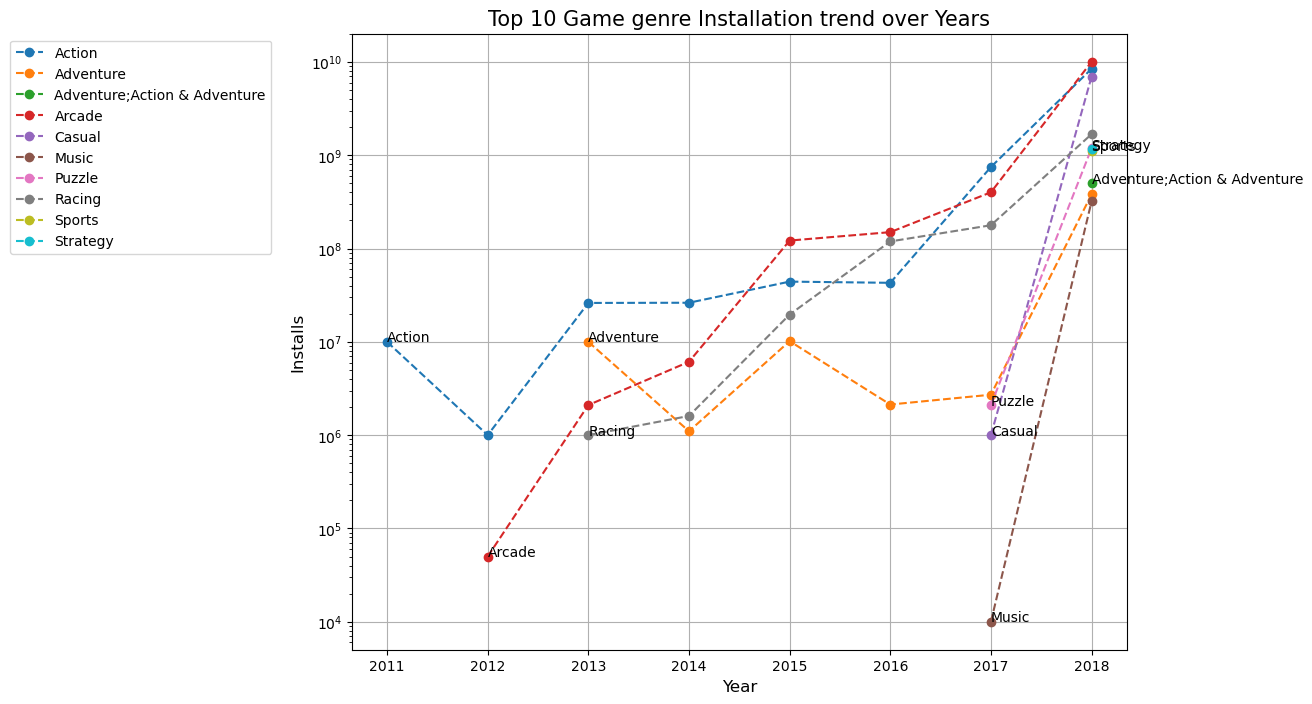

In [51]:
#Create a dataset which contains only top 10 game genre
t10 = g_ir.iloc[0:10, :].reset_index()
top10=t10['genres'].unique().tolist()
t10df = game[game['genres'].isin(top10)]

#group genres by year and sum the installations
gp_t10=[(g,group.groupby('year',observed=True)['installs'].sum())
       for g,group in t10df.groupby('genres',observed=True)]
plt.figure(figsize=(10,8))
for g,val in gp_t10:
    plt.plot(val.index,val.values,label=g,marker='o',linestyle='--')
    x=val.index[0]
    y=val.values[0]
    plt.text(x, y,g)
    
plt.yscale('log')
plt.grid()
plt.xlabel('Year',fontsize=12)
plt.ylabel('Installs',fontsize=12)
plt.title('Top 10 Game genre Installation trend over Years',fontsize=15)
plt.legend(loc='upper left',bbox_to_anchor=(-0.45,1))


## Key Insights:
>***Action Games Lead:*** The Action genre shows a consistently high number of installs, starting strong in 2011, experiencing a dip in 2012, but remaining among the top genres by 2018 with installs crossing $10^{9}$

>***Adventure and Arcade Growth:*** Both Adventure and Arcade genres showed significant growth. Adventure maintains a steady increase, reaching the top ranks by 2018. Arcade starts with lower installs but experiences a sharp rise after 2015, reaching close to the top by 2018.

>***Steady Growth of Strategy and Puzzle:*** The Strategy and Puzzle genres show continuous growth from 2013 onward, with a notable spike in 2017–2018. These genres reached a high number of installs by 2018, indicating growing popularity.

>***Casual and Music Games:*** While Casual and Music genres showed a slower start, Casual maintains a moderate increase over the years, and Music sees a sudden spike after 2017.

>***Racing and Sports Trends:*** Racing and Sports genres show relatively slower growth but remain steadily popular throughout the years, with installs increasing gradually.

>***Overall Trends:*** All genres show an upward trend, especially between 2015 and 2018, suggesting a growing demand for mobile gaming across various genres, with Action and Adventure genres emerging as the most popular by 2018.

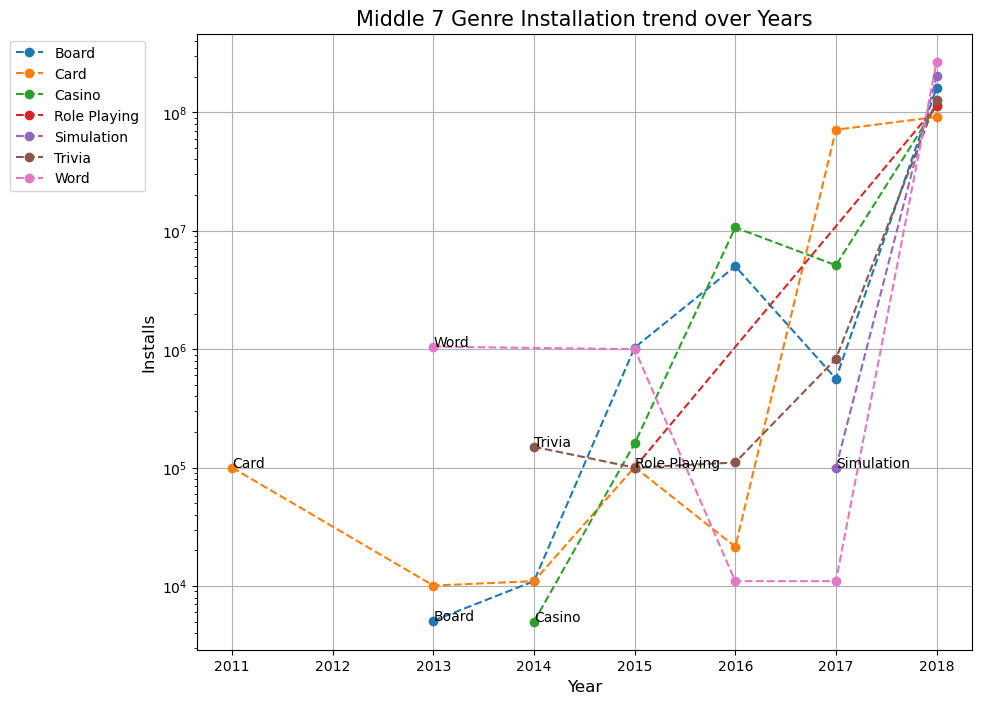

In [53]:
mid7 = g_ir.iloc[10:17, :].reset_index()
mid7=mid7['genres'].unique().tolist()
mid7df=game[game['genres'].isin(mid7)]

grp_mid=[(genre,val.groupby('year',observed=True)['installs'].sum())
        for genre,val in mid7df.groupby('genres',observed=True)]
plt.figure(figsize=(10,8))
for genre,value in grp_mid:
    plt.plot(value.index,value.values,label=genre,marker='o',linestyle='--')
    x=value.index[0]
    y=value.values[0]
    plt.text(x,y,genre)

plt.xlabel('Year',fontsize=12)
plt.ylabel('Installs',fontsize=12)
plt.title('Middle 7 Genre Installation trend over Years',fontsize=15)
plt.yscale('log')
plt.legend(loc='upper left',bbox_to_anchor=(-0.25,1))
plt.grid()

## Key Insights:
>This chart highlights the rise in popularity of Simulation, Word, and Role-Playing games, alongside a general increase in interest across all genres during 2016-2018. These trends suggest that mobile gamers were increasingly diversifying into different genres during this period

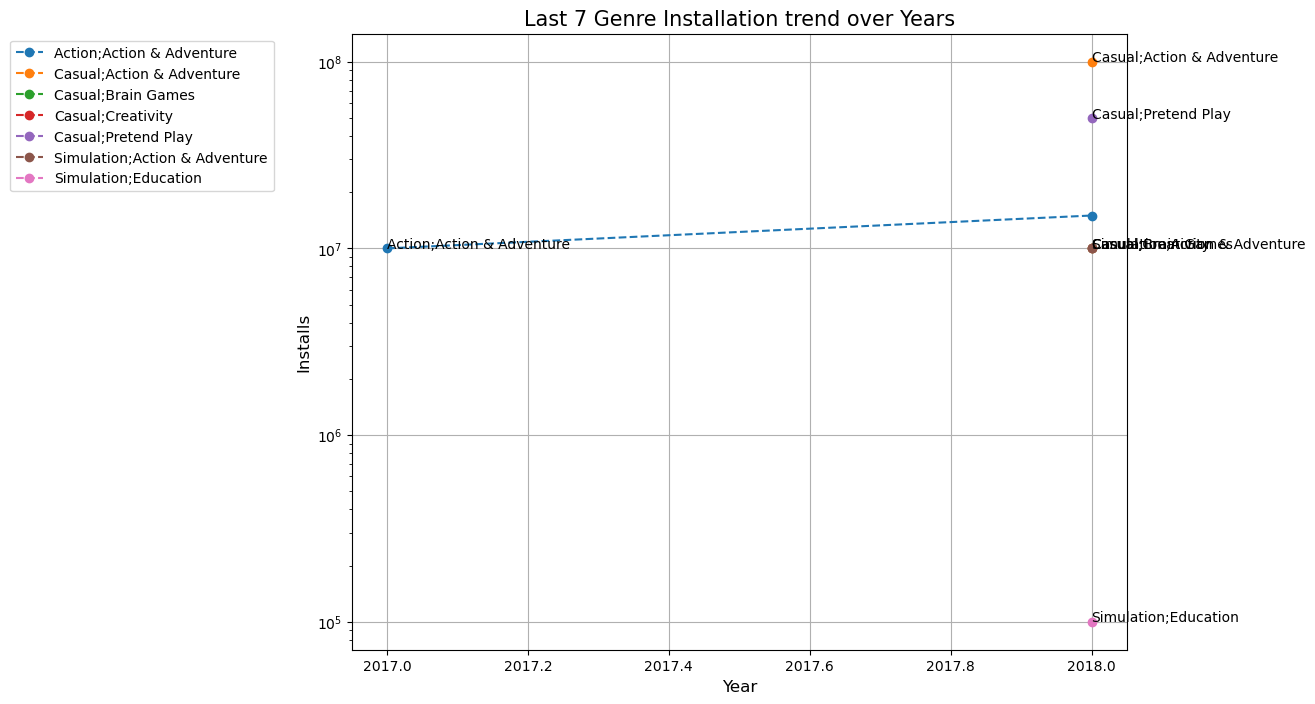

In [55]:

la7=g_ir.iloc[17:25,].reset_index()
la7=la7['genres'].unique().tolist()

l7df=game[game['genres'].isin(la7)]

gl7=[(gen,inst.groupby('year',observed=True)['installs'].sum())
    for gen,inst in l7df.groupby('genres',observed=True)]
plt.figure(figsize=(10,8))
for genlab,in_val in gl7:
    plt.plot(in_val.index,in_val.values,label=genlab,marker='o',linestyle='--')
    x=in_val.index[0]
    y=in_val.values[0]
    plt.text(x,y,genlab)

plt.xlabel('Year',fontsize=12)
plt.ylabel('Installs',fontsize=12)
plt.title('Last 7 Genre Installation trend over Years',fontsize=15)
plt.yscale('log')
plt.legend(loc='upper left',bbox_to_anchor=(-0.45,1))
plt.grid()


## Key Insights
>Casual games, especially in subgenres like Action & Adventure and Pretend Play, are quickly growing and challenging traditional categories like Action; Action & Adventure.